## Regresion Polinomial & Feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('winequality-red.csv')


### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

# Correlation Plot of Variables
A Correlation matrix is created in order to determine which variables will be selected for the model.

In [4]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.256131,0.671703,0.114777,0.0937052,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.0616683,0.124052
volatile acidity,-0.256131,1,-0.552496,0.00191788,0.0612978,-0.0105038,0.07647,0.0220262,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1,0.143577,0.203823,-0.0609781,0.035533,0.364947,-0.541904,0.31277,0.109903,0.226373
residual sugar,0.114777,0.00191788,0.143577,1,0.0556095,0.187049,0.203028,0.355283,-0.0856524,0.00552712,0.0420754,0.0137316
chlorides,0.0937052,0.0612978,0.203823,0.0556095,1,0.00556215,0.0474005,0.200632,-0.265026,0.37126,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.0105038,-0.0609781,0.187049,0.00556215,1,0.667666,-0.0219458,0.0703775,0.0516576,-0.0694084,-0.0506561
total sulfur dioxide,-0.113181,0.07647,0.035533,0.203028,0.0474005,0.667666,1,0.0712695,-0.0664946,0.0429468,-0.205654,-0.1851
density,0.668047,0.0220262,0.364947,0.355283,0.200632,-0.0219458,0.0712695,1,-0.341699,0.148506,-0.49618,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.0856524,-0.265026,0.0703775,-0.0664946,-0.341699,1,-0.196648,0.205633,-0.0577314
sulphates,0.183006,-0.260987,0.31277,0.00552712,0.37126,0.0516576,0.0429468,0.148506,-0.196648,1,0.0935948,0.251397


We can see that the variables that are the most correlated to quality are alcohol, volatile acidity, and total sulfur dioxide.
We will use this three variables for our model, and we will try to determine if a relationship between those variables exists in our regression.

In [5]:
df =data[["quality","volatile acidity", "alcohol", "total sulfur dioxide"]]

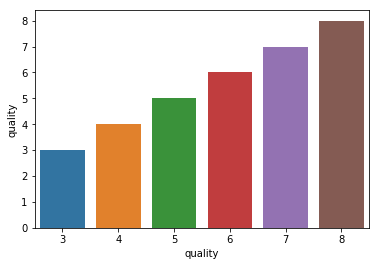

In [6]:
sns.barplot(x= df["quality"], y=df["quality"])

Even though the wine dataset states that quality ranges from 0 to 10, it is actually from 3 to 8.

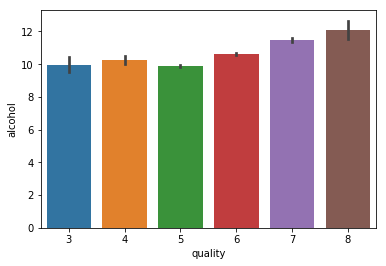

In [7]:
sns.barplot(x= df["quality"], y=df["alcohol"])

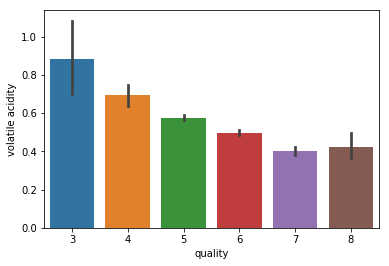

In [8]:
sns.barplot(x= df["quality"], y=df["volatile acidity"])

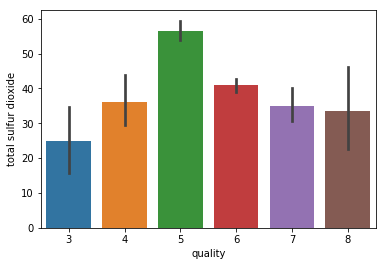

In [9]:
sns.barplot(x= df["quality"], y=df["total sulfur dioxide"])

## Generating the polynomial model
We will transform our subset dataset into a numpy matrix. 

In [22]:
df["volatile_acidity*total_sulfur_dioxide"] = df["volatile acidity"]*df["total sulfur dioxide"]
df["alcohol*volatile_acidity"]= df["volatile acidity"]*df["alcohol"]

C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
df.head()

,quality,volatile acidity,alcohol,total sulfur dioxide,volatile_acidity*total_sulfur_dioxide,alcohol*volatile_acidity
0,5,0.70,9.4,34.0,23.80,6.580
1,5,0.88,9.8,67.0,58.96,8.624
2,5,0.76,9.8,54.0,41.04,7.448
3,6,0.28,9.8,60.0,16.80,2.744
4,5,0.70,9.4,34.0,23.80,6.580


In [12]:
x= df[["volatile acidity", "alcohol", "total sulfur dioxide", "volatile_acidity*total_sulfur_dioxide"]].values
y= df["quality"].values
y= y.reshape((y.size, 1))
np.shape(y)

(1599, 1)

# Test Code (Ignore)

In [93]:
tf.reset_default_graph()

In [106]:
#Hyperparameters
#We add a new hyperparameter n that represents the order of the polynomial regression
n = np.shape(x[1])[0]
learning_rate = 0.0001
training_epochs = 1000

#placeholders

##constantes y placeholders son nodos. por constantes nos referimos a informacion constante. 
## un placeholder es un nodo vacio, que toma valor hasta que en la sesion ejecutemos el grafo. 
X = tf.placeholder(tf.float64, name = "Xs", shape =[None,n]) 
Y = tf.placeholder(tf.float64, name = "Y", shape = [None,1])

#trainable variables defined randomly
#We define the shape of W because now we have n different weight in our regression.

W = tf.Variable(np.random.randn(n,1), name = "W") 
b = tf.Variable(np.random.randn(1), name = "b")



# Hypothesis 
with tf.name_scope("Hipotesis"):
    #y_pred = tf.add(tf.multiply(X, W), b, name = "Hipotesis_producto_punto") 
    y_pred=tf.add(tf.matmul(X,W),b, name="Hipotesis_producto_punto")

with tf.name_scope("Cost_func"):
    #Mean Squared Error Cost Function 
    #cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
    cost = tf.reduce_mean(tf.square(y_pred -Y ))
  
#Gradient Descent Optimizer 
with tf.name_scope("Optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
#Global Variables Initializer 
init = tf.global_variables_initializer() 

with tf.name_scope("Disturbance"):
    disturbance = tf.summary.scalar(name = "Costfunction", tensor = cost)

In [111]:

#iniciar sesion
with tf.Session() as sess: 
    
      
    
    #ejecutar los nodos 
    sess.run(init)
   
   
    writer = tf.summary.FileWriter( './pol_reg_graphs/test', sess.graph)
    
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 

        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(disturbance, feed_dict = {X : x, Y : y}) 
            writer.add_summary(c,epoch)
            #print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
    
    writer.close()
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b)


    
    

Training cost = 0.6002735736648765 Weight = [[-1.71105802]
 [ 0.69727848]
 [-0.00681957]
 [ 0.01662467]] bias = [-0.86353404] 



In [44]:
def polynomial_regression(x_train,y_train,training_epochs,lr):
    tf.reset_default_graph()
    
    #We define the shape of W because now we have n different weight in our regression.  
    n = np.shape(x[1])[0]


    #placeholders 
    X = tf.placeholder(tf.float64, name = "Xs", shape =[None,n]) 
    Y = tf.placeholder(tf.float64, name = "Y", shape = [None,1])

    #trainable variables defined randomly


    W = tf.Variable(np.random.randn(n,1), name = "W") 
    b = tf.Variable(np.random.randn(1), name = "b")

    # Hypothesis 
    with tf.name_scope("Hipotesis"):
        #y_pred = tf.add(tf.multiply(X, W), b, name = "Hipotesis_producto_punto") 
        y_pred=tf.add(tf.matmul(X,W),b, name="Hipotesis_producto_punto")

    with tf.name_scope("Cost_func"):
        
        #Mean Squared Error Cost Function 
        #cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
        cost = tf.reduce_mean(tf.square(y_pred -Y ))

    #Gradient Descent Optimizer 
    with tf.name_scope("Optimizer"):
        optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost) 

    #Global Variables Initializer 
    init = tf.global_variables_initializer() 

    with tf.name_scope("Disturbance"):
        disturbance = tf.summary.scalar(name = "Costfunction", tensor = cost)
        

        #iniciar sesion
    with tf.Session() as sess: 



        #ejecutar los nodos 
        sess.run(init)


        writer = tf.summary.FileWriter( './pol_reg_graphs/'+str(lr), sess.graph)


        # Iterating through all the epochs 
        for epoch in range(training_epochs): 

            # Feeding each data point into the optimizer using Feed Dictionary 

            sess.run(optimizer, feed_dict = {X : x_train, Y : y_train}) 

            # Displaying the result after every 50 epochs 
            if (epoch + 1) % 50 == 0: 
                # Calculating the cost a every epoch 
                c = sess.run(disturbance, feed_dict = {X : x_train, Y : y_train}) 
                writer.add_summary(c,epoch)
                #print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

        writer.close()
        
    # Storing necessary values to be used outside the Session 
        training_cost = sess.run(cost, feed_dict ={X: x_train, Y: y_train}) 
        weight = sess.run(W) 
        bias = sess.run(b)
        
        predictions =np.matmul(x,weight) + bias
        print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')
        
    print("polynomial regression with learning rate " +str(lr))
    print("error cost function graph stored at ./pol_reg_graphs/'"+str(lr))
    #print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')    
    #predictions =np.matmul(x,weight) + bias
    sess.close()
     

# TensorFlow Graph of Polynomial Model 

<img src="./error_graphs/grafo.png" />

# First Model 

Polynomial regression for the first model ran at different learning rates.

In [45]:
x= df[["volatile acidity", "alcohol", "total sulfur dioxide", "volatile_acidity*total_sulfur_dioxide"]].values
y= df["quality"].values
y= y.reshape((y.size, 1))

polynomial_regression(x_train=x,y_train=y,lr=1,training_epochs=1000)


Training cost = nan Weight = [[nan]
 [nan]
 [nan]
 [nan]] bias = [nan] 

polynomial regression with learning rate 1
error cost function graph stored at ./pol_reg_graphs/'1


In [17]:
polynomial_regression(x_train=x,y_train=y,lr=0.1,training_epochs=1000)

Training cost = nan Weight = [[nan]
 [nan]
 [nan]
 [nan]] bias = [nan] 

polynomial regression with learning rate 0.1
error cost function graph stored at ./pol_reg_graphs/'0.1


In [18]:
polynomial_regression(x_train=x,y_train=y,lr=0.01,training_epochs=1000)

Training cost = nan Weight = [[nan]
 [nan]
 [nan]
 [nan]] bias = [nan] 

polynomial regression with learning rate 0.01
error cost function graph stored at ./pol_reg_graphs/'0.01


In [19]:
polynomial_regression(x_train=x,y_train=y,lr=0.001,training_epochs=1000)

Training cost = nan Weight = [[nan]
 [nan]
 [nan]
 [nan]] bias = [nan] 

polynomial regression with learning rate 0.001
error cost function graph stored at ./pol_reg_graphs/'0.001


In [20]:
polynomial_regression(x_train=x,y_train=y,lr=0.0001,training_epochs=1000)

Training cost = 0.47204824056753814 Weight = [[-8.23303761e-01]
 [ 4.58890839e-01]
 [-5.27696153e-04]
 [ 1.90962404e-05]] bias = [1.29704956] 

polynomial regression with learning rate 0.0001
error cost function graph stored at ./pol_reg_graphs/'0.0001


In [21]:
polynomial_regression(x_train=x,y_train=y,lr=0.00001,training_epochs=1000)

Training cost = 4.976152224527184 Weight = [[-0.19076229]
 [ 0.47279009]
 [ 0.13115438]
 [-0.17830595]] bias = [-1.45243278] 

polynomial regression with learning rate 1e-05
error cost function graph stored at ./pol_reg_graphs/'1e-05


# 2nd model 

In [41]:
def polynomial_regression(x_train,y_train,training_epochs,lr):
    tf.reset_default_graph()
    
    #We define the shape of W because now we have n different weight in our regression.  
    n = np.shape(x[1])[0]


    #placeholders 
    X = tf.placeholder(tf.float64, name = "Xs", shape =[None,n]) 
    Y = tf.placeholder(tf.float64, name = "Y", shape = [None,1])

    #trainable variables defined randomly


    W = tf.Variable(np.random.randn(n,1), name = "W") 
    b = tf.Variable(np.random.randn(1), name = "b")

    # Hypothesis 
    with tf.name_scope("Hipotesis"):
        #y_pred = tf.add(tf.multiply(X, W), b, name = "Hipotesis_producto_punto") 
        y_pred=tf.add(tf.matmul(X,W),b, name="Hipotesis_producto_punto")

    with tf.name_scope("Cost_func"):
        
        #Mean Squared Error Cost Function 
        #cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
        cost = tf.reduce_mean(tf.square(y_pred -Y ))

    #Gradient Descent Optimizer 
    with tf.name_scope("Optimizer"):
        optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost) 

    #Global Variables Initializer 
    init = tf.global_variables_initializer() 

    with tf.name_scope("Disturbance"):
        disturbance = tf.summary.scalar(name = "Costfunction", tensor = cost)
        

        #iniciar sesion
    with tf.Session() as sess: 



        #ejecutar los nodos 
        sess.run(init)


        writer = tf.summary.FileWriter( './pol_reg_graphs2/'+str(lr), sess.graph)


        # Iterating through all the epochs 
        for epoch in range(training_epochs): 

            # Feeding each data point into the optimizer using Feed Dictionary 

            sess.run(optimizer, feed_dict = {X : x_train, Y : y_train}) 

            # Displaying the result after every 50 epochs 
            if (epoch + 1) % 50 == 0: 
                # Calculating the cost a every epoch 
                c = sess.run(disturbance, feed_dict = {X : x_train, Y : y_train}) 
                writer.add_summary(c,epoch)
                #print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

        writer.close()
        
    # Storing necessary values to be used outside the Session 
        training_cost = sess.run(cost, feed_dict ={X: x_train, Y: y_train}) 
        weight = sess.run(W) 
        bias = sess.run(b)
        
        predictions =np.matmul(x,weight) + bias
        print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')
        
    print("polynomial regression with learning rate " +str(lr))
    print("error cost function graph stored at ./pol_reg_graphs2/'"+str(lr))
    #print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')    
    #predictions =np.matmul(x,weight) + bias
    sess.close()
     

In [42]:
x= df[["volatile acidity", "alcohol", "total sulfur dioxide", "alcohol*volatile_acidity"]].values
y= df["quality"].values
y= y.reshape((y.size, 1))

polynomial_regression(x_train=x,y_train=y,lr=1,training_epochs=1000)


Training cost = nan Weight = [[nan]
 [nan]
 [nan]
 [nan]] bias = [nan] 

polynomial regression with learning rate 1
error cost function graph stored at ./pol_reg_graphs2/'1


In [43]:
polynomial_regression(x_train=x,y_train=y,lr=0.1,training_epochs=1000)

Training cost = nan Weight = [[nan]
 [nan]
 [nan]
 [nan]] bias = [nan] 

polynomial regression with learning rate 0.1
error cost function graph stored at ./pol_reg_graphs2/'0.1


In [37]:
polynomial_regression(x_train=x,y_train=y,lr=0.01,training_epochs=1000)

Training cost = nan Weight = [[nan]
 [nan]
 [nan]
 [nan]] bias = [nan] 

polynomial regression with learning rate 0.01
error cost function graph stored at ./pol_reg_graphs2/'0.01


In [38]:
polynomial_regression(x_train=x,y_train=y,lr=0.001,training_epochs=1000)

Training cost = nan Weight = [[nan]
 [nan]
 [nan]
 [nan]] bias = [nan] 

polynomial regression with learning rate 0.001
error cost function graph stored at ./pol_reg_graphs2/'0.001


In [39]:
polynomial_regression(x_train=x,y_train=y,lr=0.0001,training_epochs=1000)

Training cost = 0.5288838744040257 Weight = [[-1.21692559e+00]
 [ 5.50433830e-01]
 [-3.51905014e-05]
 [-1.12301968e-01]] bias = [1.15017639] 

polynomial regression with learning rate 0.0001
error cost function graph stored at ./pol_reg_graphs2/'0.0001


In [40]:
polynomial_regression(x_train=x,y_train=y,lr=0.00001,training_epochs=1000)

Training cost = 1.6395828351686654 Weight = [[-1.1361881 ]
 [ 0.80470784]
 [-0.00913104]
 [-0.51512847]] bias = [1.3275733] 

polynomial regression with learning rate 1e-05
error cost function graph stored at ./pol_reg_graphs2/'1e-05


# Results and Conclusions

<img src="./error_graphs/er_1.png" /> 
<img src="./error_graphs/er_2.png" /> 

For both models, using learning rates equal or higher than 0.001 resulted in not having an error function. For this particular problem, those values were too high.

At a learning rate of 0.0001, both models start to converge to small values: 0.47204824056753814 and 0.7672364710153261 respectively.

At a learning rate of 0.00001, both model errors increases. Of all the learning rates, 0.0001 gives the smallest training cost.

As for models, we see a better performance for model 1, which has the interaction between volatile acidity and total sulfur dioxide. This is the optimal model for the variables tested.